In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow import keras

In [2]:
from platform import python_version
print(python_version())

3.6.5


In [3]:
keras.__version__

'2.1.6-tf'

In [4]:
tf.__version__

'1.11.0'

In [6]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('../VesQuant4ML_data/data_labelled.csv', header=None,
                    names=["t_time","t_angle","run_diff","vel_diff","class"])

In [8]:
data.head()

,t_time,t_angle,run_diff,vel_diff,class
0,0.46,37.186,155.370,0.18187,4
1,0.30,91.094,-88.100,-0.07524,2
2,0.70,156.370,99.360,0.01621,2
3,0.41,157.640,-127.320,-0.11604,3
4,0.56,67.791,0.385,0.22480,4


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
t_time      146 non-null float64
t_angle     146 non-null float64
run_diff    146 non-null float64
vel_diff    146 non-null float64
class       146 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.8 KB


In [10]:
data.describe()

,t_time,t_angle,run_diff,vel_diff,class
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.884589,86.657967,-3.488911,0.012235,2.732877
std,1.165460,49.191471,222.697225,0.424232,0.984648
min,0.010000,6.801400,-856.180000,-1.104500,1.000000
25%,0.282500,37.853250,-57.220500,-0.184642,2.000000
50%,0.505000,89.254000,0.055500,0.005940,3.000000
75%,1.070000,129.970000,68.881500,0.165242,4.000000
max,9.190000,168.620000,774.230000,2.121900,4.000000


In [11]:
data['class'].value_counts()

2    59
4    44
3    31
1    12
Name: class, dtype: int64

In [12]:
g = sns.pairplot(data,hue='class',markers='+')

NameError: name 'sns' is not defined

In [13]:
# g = sns.violinplot(y='class', x ='t_time', data=data, inner='quartile')
# plt.show()
# g = sns.violinplot(y='class', x ='t_angle', data=data, inner='quartile')
# plt.show()
# g = sns.violinplot(y='class', x ='run_diff', data=data, inner='quartile')
# plt.show()
# g = sns.violinplot(y='class', x ='vel_diff', data=data, inner='quartile')
# plt.show()

X = data.drop('class',axis=1)
y = data['class']
print(X.shape)
print(y.shape)

(146, 4)
(146,)


Text(0.5, 1.0, 'Accuracy Scores for Values of k of K-nearest Neighbors')

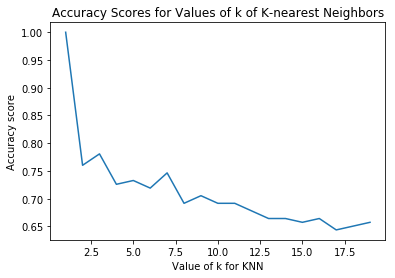

In [14]:
# K-nearest neighbors
k_range = list(range(1,20))
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy score')
plt.title('Accuracy Scores for Values of k of K-nearest Neighbors')

In [15]:
logreg= LogisticRegression()
logreg.fit(X,y)
y_predict = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.6575342465753424


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87, 4)
(59, 4)
(87,)
(59,)


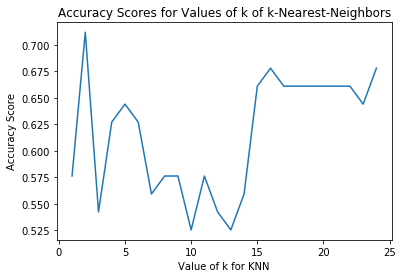

In [17]:
k_range = list(range(1,25))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.559322033898305


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<AxesSubplot:>

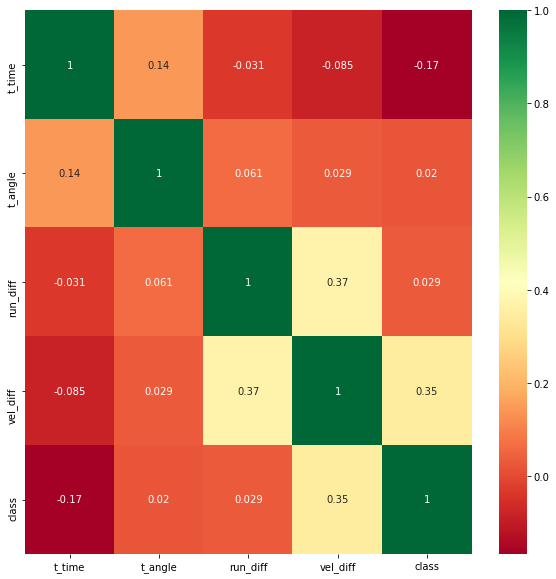

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True,cmap="RdYlGn")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(109, 4)
(37, 4)
(109,)
(37,)


In [20]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[ 1  0  1  1]
 [ 0 15  1  1]
 [ 0  2  3  0]
 [ 0  3  2  7]]


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 72.60 %
Standard Deviation: 9.02 %


In [22]:
X_new = data.drop(['t_time','t_angle','class'],axis=1)
y = data['class']
print(X_new.shape)
print(y.shape)

(146, 2)
(146,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 2)
(44, 2)
(102,)
(44,)


In [ ]:
classifier=SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
